In [10]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import additionalplot_solution_1, additionalplot_solution_2

We'll continue to make use of the fuel economy dataset in this workspace.

In [11]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()
fuel_econ.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


**Task 1**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [12]:
make_counts = fuel_econ['make'].value_counts()
# make_counts = pd.Series([ make_counts['BMW'], make_counts['Nissan'] ], index = ['BMW','Nissan'])
make_counts
# make_counts.head()
# make_counts.describe
# type(make_counts)
make_counts = make_counts [ make_counts.ge(80) ]
make_counts
# makes.index
# make_counts
# makes.index
makes = make_counts.index
makes

Index(['BMW', 'Mercedes-Benz', 'Porsche', 'Ford', 'Chevrolet', 'Audi', 'MINI',
       'Volkswagen', 'Hyundai', 'Dodge', 'Lexus', 'Kia', 'Cadillac', 'Toyota',
       'Infiniti', 'Honda', 'Jaguar', 'Mazda'],
      dtype='object')

In [13]:
# print(len(fuel_econ));
# fuel_econ[fuel_econ['make'] == 'Nissan'] # .isin(makes.index) # ['make' == 'Nissan']
# fuel_econ[fuel_econ['make'] == 'Nissan']['make'].isin(makes.index) # ['make' == 'Nissan']
eighty_plus = fuel_econ [ fuel_econ['make'].isin(makes) ]
# x.index(['make'])
# eighty_plus.head()
# eighty_plus.describe()

In [14]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
make_frequency # ordered from high to low
make_frequency >= THRESHOLD
limit = np.sum(make_frequency > THRESHOLD)
# make_frequency[limit-1]
eighty_plus_makes = make_frequency.index[:limit]
eighty_plus = fuel_econ.loc[fuel_econ['make'].isin(eighty_plus_makes)]

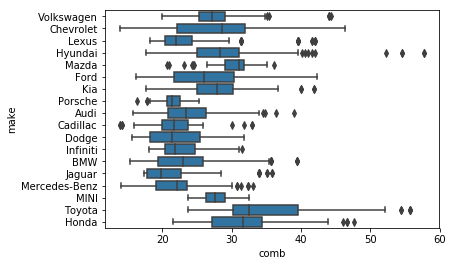

In [15]:
base_color = sb.color_palette()[0]
# plt.errorbar(data = eighty_plus, x = 'make', y = 'comb');
sb.boxplot(data = eighty_plus, x = 'comb', y = 'make', color = base_color);
# plt.xticks(rotation = 60);

In [16]:
make_means = eighty_plus.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

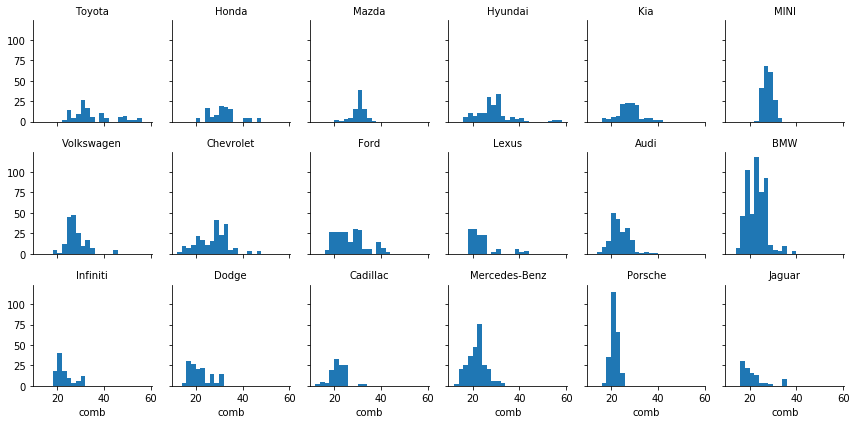

In [43]:
g = sb.FacetGrid(data = eighty_plus, col = 'make', col_wrap = 6, col_order = comb_order, size = 2)
g.map(plt.hist, "comb", bins = np.arange(12, eighty_plus['comb'].max()+2, 2));
g.set_titles('{col_name}');

In [20]:
# run this cell to check your work against ours
# additionalplot_solution_1()

**Task 2**: Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

In [45]:
make_means = eighty_plus.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

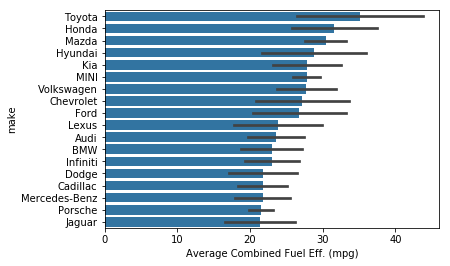

In [48]:
base_color = sb.color_palette()[0]
sb.barplot(data = eighty_plus, x = 'comb', y = 'make', color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.


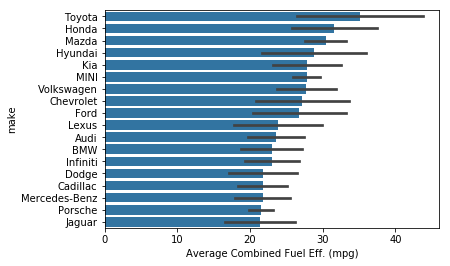

In [49]:
# run this cell to check your work against ours
additionalplot_solution_2()

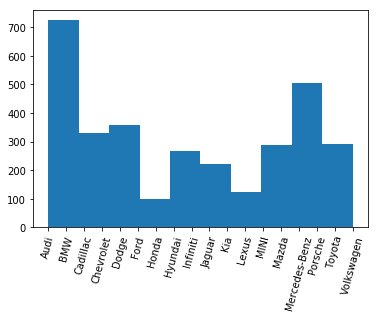

In [61]:
# create a histogram of the data
bin_size = 0.5
min_y = 0
max_y = 700
bin_edges = np.arange(min_y, max_y + bin_size, bin_size)
plt.hist(data = eighty_plus, x = 'make'); # , bins = bin_edges);
plt.xticks(rotation = 75);

THRESHOLD = 80
make_frequency = eighty_plus['make'].value_counts()

# overlay a theoretical normal distribution on top
samp_mean = make_frequency.mean()
samp_sd = make_frequency.std()

from scipy.stats import norm
# x = np.linspace(4, 18, 200)
# y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
# y *= df.shape[0] * bin_size # scale the distribution height

# plt.plot(x, y)